TUGAS 12

In [ ]:
#Anggreyni Ayu Hapsary
#0110222058

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from scipy.stats import beta
from scipy.stats import f
from keras.models import Sequential
from keras.layers import Dense
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [3]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1pfs34nik3CkJczS2Gj-inZWjKtz1ZPh-')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.iloc[:, 1:-1]

variables = df.iloc[:, 1:]
labels = df.iloc[:, 0]

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df_visualization = df.iloc[:, [0, 1, 2, 3, 4, 14, 21, 22, 23, 24]]
df_visualization

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,M,17.99,10.38,122.80,1001.0,153.40,25.380,17.33,184.60,2019.0
1,M,20.57,17.77,132.90,1326.0,74.08,24.990,23.41,158.80,1956.0
2,M,19.69,21.25,130.00,1203.0,94.03,23.570,25.53,152.50,1709.0
3,M,11.42,20.38,77.58,386.1,27.23,14.910,26.50,98.87,567.7
4,M,20.29,14.34,135.10,1297.0,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,158.70,25.450,26.40,166.10,2027.0
565,M,20.13,28.25,131.20,1261.0,99.04,23.690,38.25,155.00,1731.0
566,M,16.60,28.08,108.30,858.1,48.55,18.980,34.12,126.70,1124.0
567,M,20.60,29.33,140.10,1265.0,86.22,25.740,39.42,184.60,1821.0


/tmp/ipython-input-2139643902.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


[Text(0, 0, 'radius_mean'),
 Text(1, 0, 'texture_mean'),
 Text(2, 0, 'perimeter_mean'),
 Text(3, 0, 'area_mean'),
 Text(4, 0, 'area_se'),
 Text(5, 0, 'radius_worst'),
 Text(6, 0, 'texture_worst'),
 Text(7, 0, 'perimeter_worst'),
 Text(8, 0, 'area_worst')]

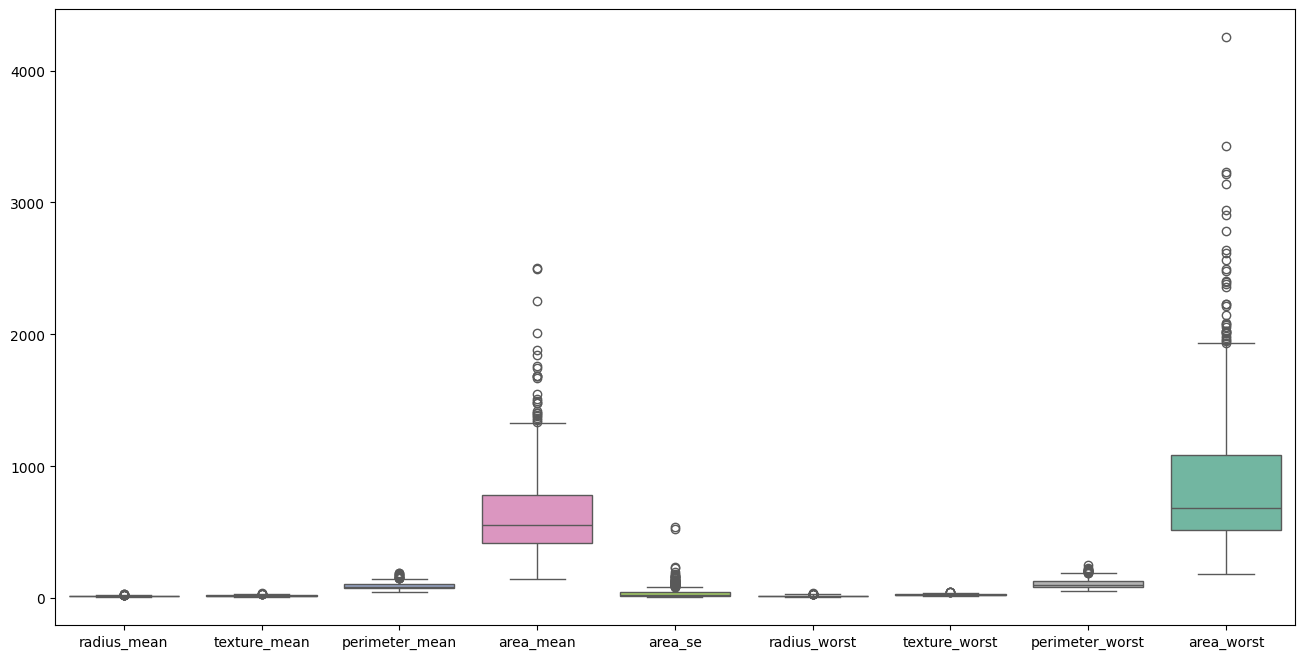

In [11]:
# Visualisation blox plot
fig=plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(data=df_visualization, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

In [12]:
Q1 = variables.quantile(0.25)
Q3 = variables.quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

print('Lower Whisker:')
print(Lower_Whisker)
print('\n\n\nUpperWhisker:')
print(Upper_Whisker)

Lower_outliers = variables < Lower_Whisker
Upper_outliers = variables > Upper_Whisker

Lower_outliers_index = Lower_outliers.any(axis=1)
Upper_outliers_index = Upper_outliers.any(axis=1)

Lower Whisker:
radius_mean                  5.580000
texture_mean                 7.725000
perimeter_mean              31.775000
area_mean                 -123.300000
smoothness_mean              0.057975
compactness_mean            -0.033300
concavity_mean              -0.122150
concave points_mean         -0.060225
symmetry_mean                0.111200
fractal_dimension_mean       0.045070
radius_se                   -0.137350
texture_se                  -0.126250
perimeter_se                -1.020500
area_se                    -23.160000
smoothness_se                0.000703
compactness_se              -0.015975
concavity_se                -0.025350
concave points_se           -0.002970
symmetry_se                  0.002680
fractal_dimension_se        -0.001217
radius_worst                 4.340000
texture_worst                8.120000
perimeter_worst             22.175000
area_worst                -337.750000
smoothness_worst             0.072500
compactness_worst           -0.1406

In [14]:
print(f'Terdapat {sum(Lower_outliers_index)} titik dibawah garis whisker')
print(f'Terdapat {sum(Upper_outliers_index)} titik diatas garis whisker')

Terdapat 3 titik dibawah garis whisker
Terdapat 170 titik diatas garis whisker


In [15]:
variables.skew()

,0
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609
fractal_dimension_mean,1.304489


In [16]:
median = variables.median()
variables = variables.where((variables >= Lower_Whisker) & (variables <= Upper_Whisker), median, axis=1)

In [17]:
variables.skew()

,0
radius_mean,0.624653
texture_mean,0.364262
perimeter_mean,0.661643
area_mean,1.007852
smoothness_mean,0.192048
compactness_mean,0.754584
concavity_mean,0.963532
concave points_mean,0.946469
symmetry_mean,0.250435
fractal_dimension_mean,0.579465


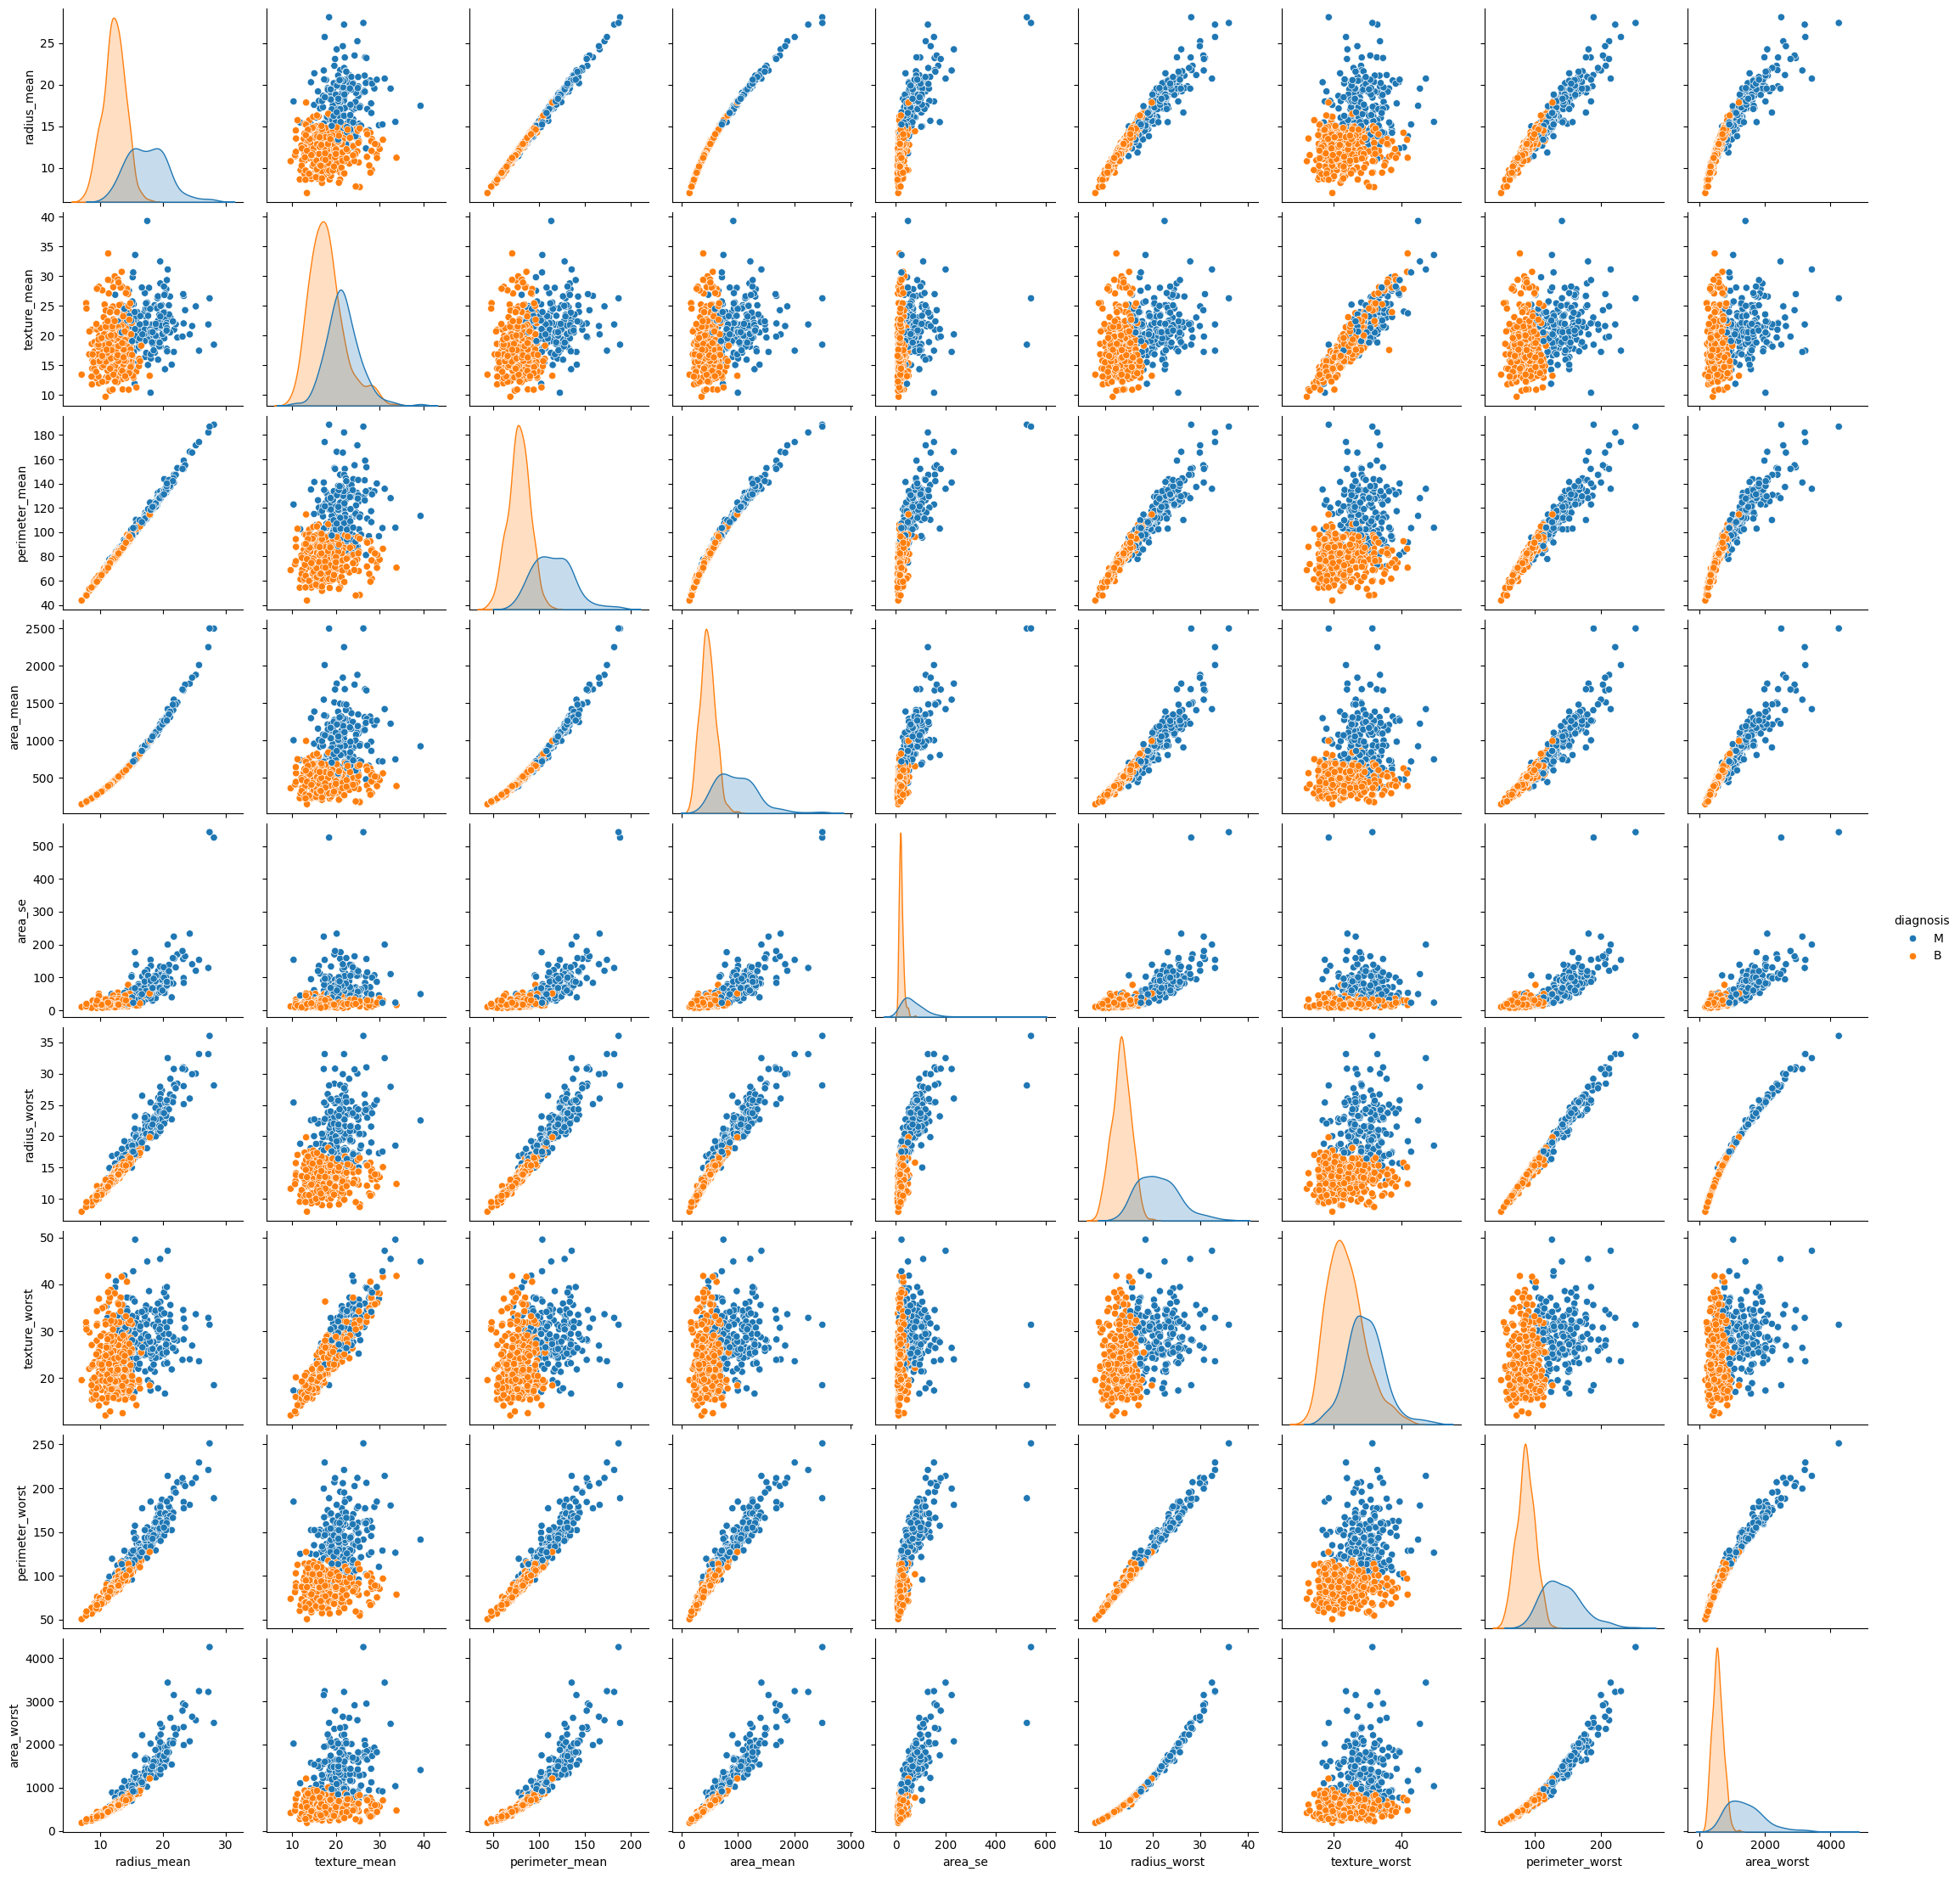

In [19]:
#plot
sns.pairplot(df_visualization, hue='diagnosis')

Text(0.5, 1.0, 'Correlation matrix')

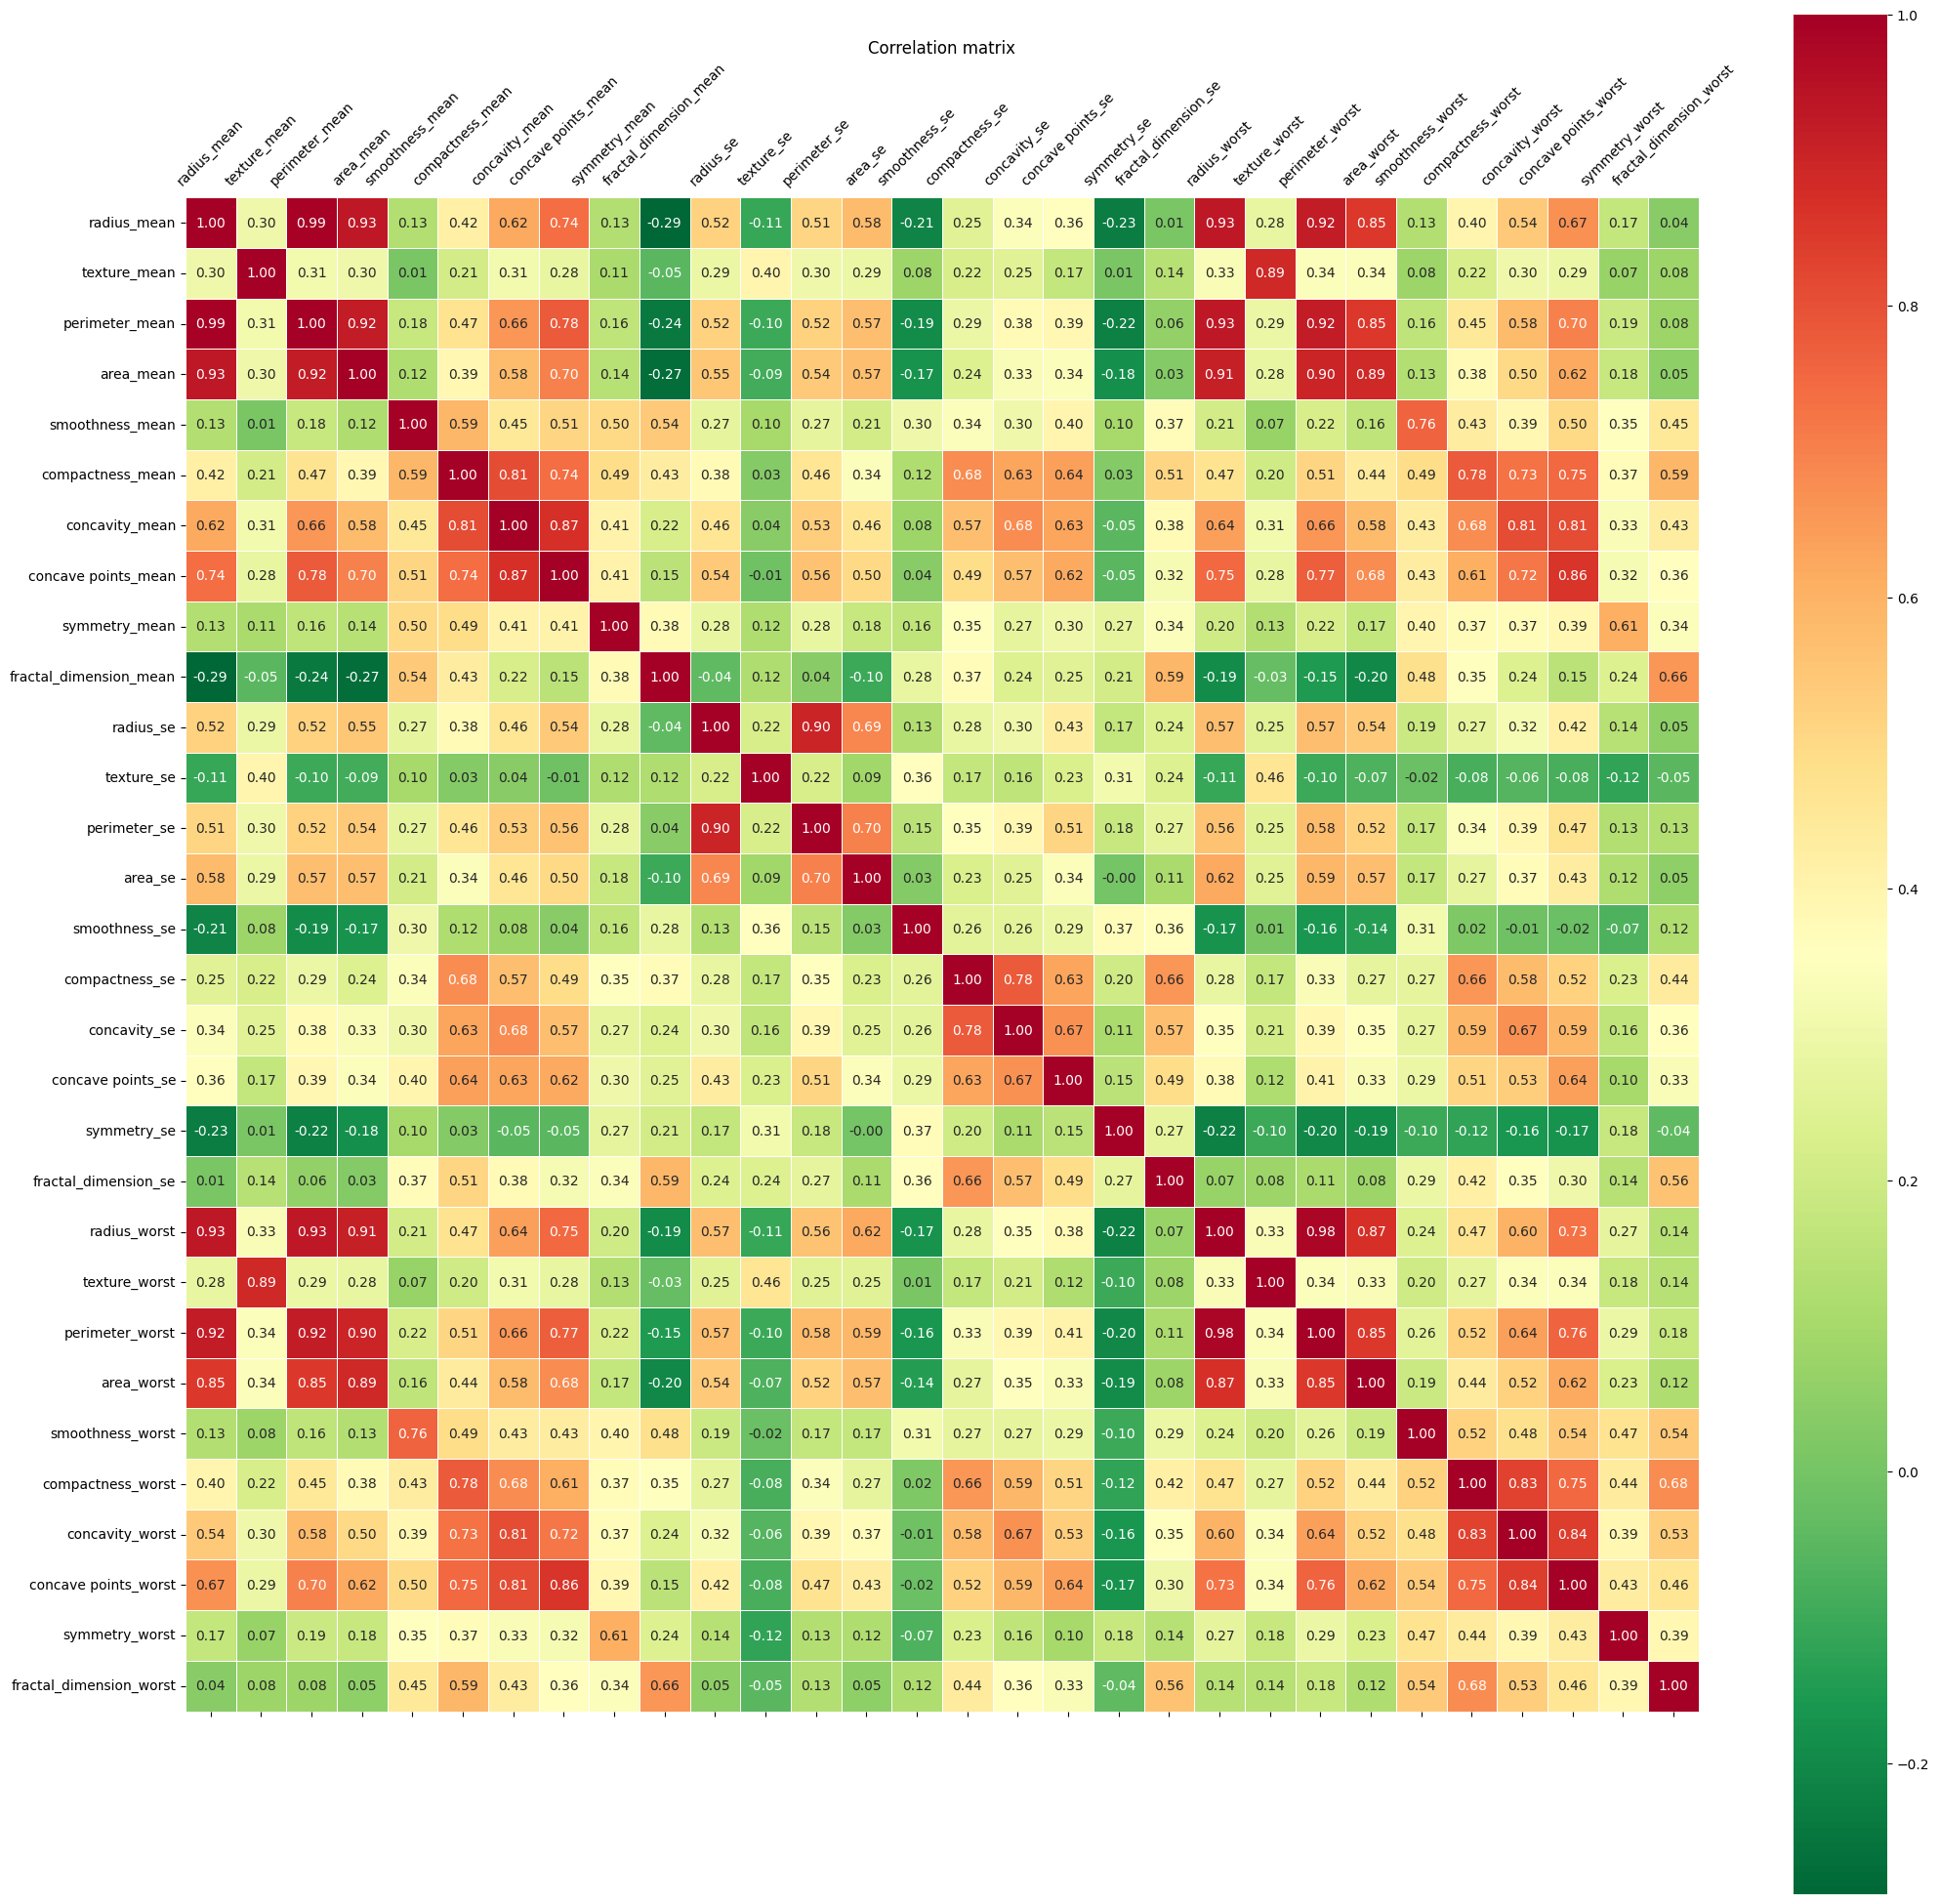

In [20]:
correlation = variables.corr('pearson')
plt.figure(figsize=(25,25), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.heatmap(correlation.round(2), cmap='RdYlGn_r', linewidths=0.5, annot=True,
                 cbar=True, square=True, fmt='0.2f')
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Correlation matrix')

In [21]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(variables, labels, test_size=0.2, random_state=0)

# standardization
sc_training = StandardScaler()
X_train = sc_training.fit_transform(X_train)
X_test = sc_training.transform(X_test)

# Principal component analysis
pca = PCA()
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

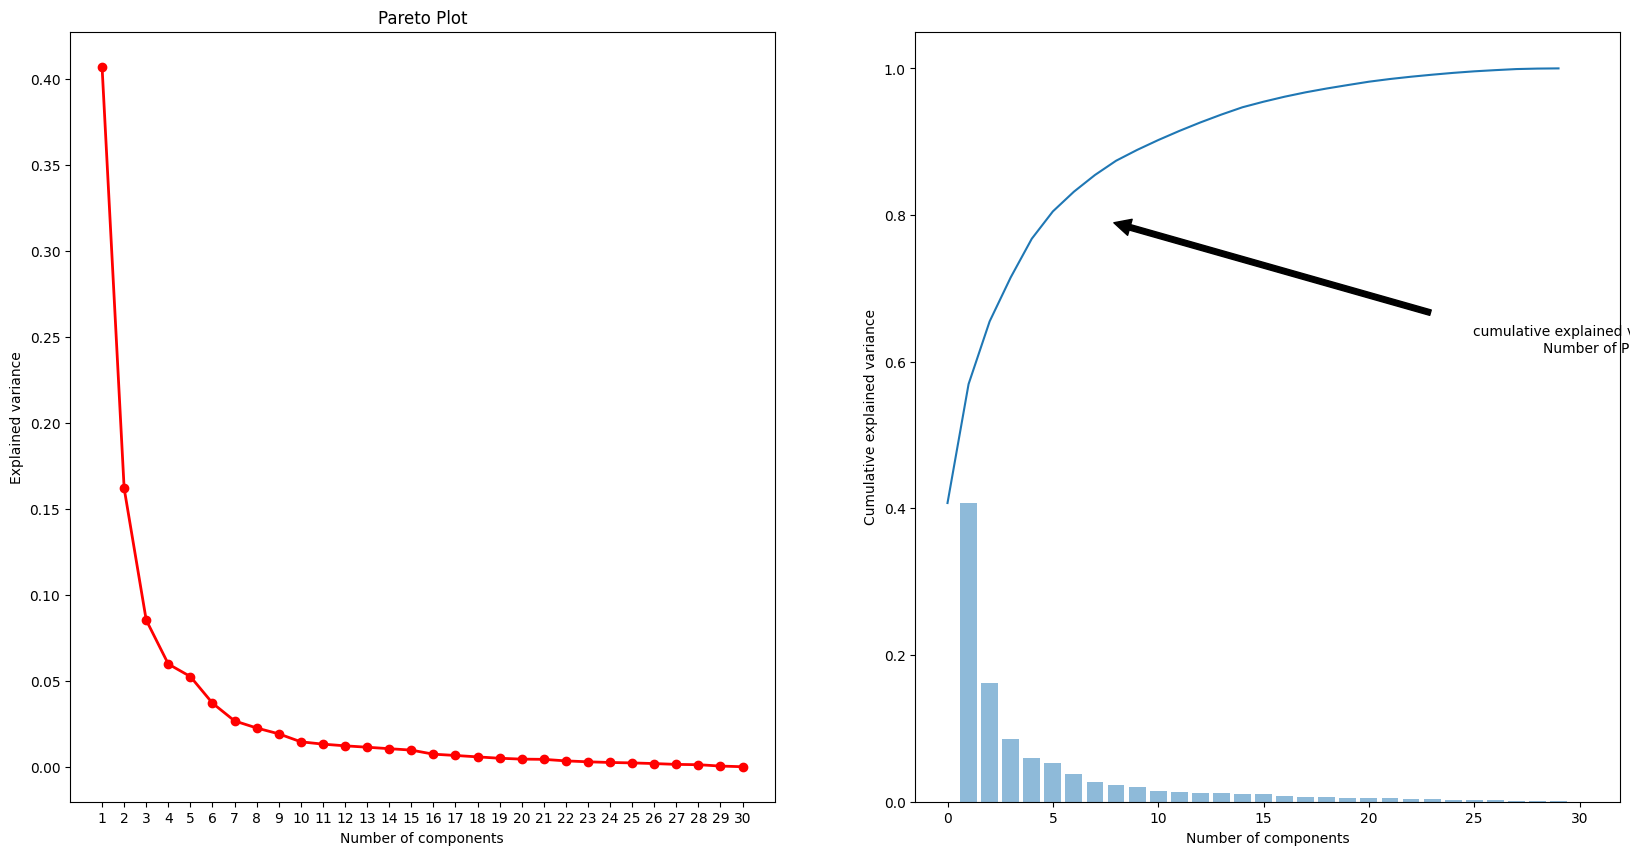

In [22]:
# Eigenvalues
Eigen_Values = pca.explained_variance_
ell = pca.explained_variance_ratio_


# Scree plot
plt.subplots(1, 2, figsize = (20, 10))

ax1 = plt.subplot(1, 2, 1)
x = np.arange(len(Eigen_Values)) + 1
ax1.plot(x, Eigen_Values / Eigen_Values.sum(), 'ro-', lw=2)
ax1.set_xticks(x, ["" + str(i) for i in x])
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance')
ax1.set_title('Scree Plot')

# Pareto plot
ax2 = plt.subplot(1, 2, 2)
ind = np.arange(1, len(ell) + 1)
ax2.bar(ind, ell, align='center', alpha=0.5)
ax2.plot(np.cumsum(ell))
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Cumulative explained variance')
ax1.set_title('Pareto Plot')

for x, y in zip(ind, np.cumsum(ell)):
    label = "{:.2f}".format(y)
    if float(label) >= 0.79:
        plt.annotate("cumulative explained variance: " + label + "\n" +
                     "Number of PC: " + str(x),  # this is the text
                     (x, y),  # this is the point to label
                     textcoords='figure fraction',  # how to position the text
                     xytext=(.8, 0.5),  # distance from text to points (x,y)
                     arrowprops=dict(facecolor='black', shrink=0.1),
                     horizontalalignment='left',
                     verticalalignment='bottom',
                     ha='center')  # horizontal alignment can be left, right or center
        NUMBER_OF_PCs = x # for further use
        break

In [23]:
Z_train = Z_train[:, :NUMBER_OF_PCs]
Z_test = Z_test[:, :NUMBER_OF_PCs]

In [25]:
Model_Score = []

# Logistic Regression
classifier_lr = LogisticRegression(random_state=0)
scores = cross_val_score(classifier_lr, Z_train, y_train, cv=10, scoring='accuracy')
lr_train_score_mean = scores.mean()
lr_train_score_std = scores.std()
classifier_lr.fit(Z_train, y_train)
model_name = 'Logistic Regression'
lr_test_score = classifier_lr.score(Z_test, y_test)

score = list((model_name, round(lr_train_score_mean, 4), round(lr_train_score_std, 4), round(lr_test_score, 4)))
Model_Score.append(score)

In [26]:
y_predicted_lr = classifier_lr.predict(Z_test)
cm_lr = confusion_matrix(y_test, y_predicted_lr)

print(cm_lr)

[[64  3]
 [ 1 46]]
